# Huggingface Model for Sentiment Analysis
## Source Data: checkmedsos_db, db_id = 87247

1. Creating confusion matrix based on training data on ./train_data_labeled.csv [DONE]


In [14]:
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install transformers
!pip3 install tensorflow
!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 11.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.6 MB/s eta 0:00:0000:0100:01
    

In [15]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")

# database connection properties
db_host='202.157.185.40'
db_user ='cekmedsos_db'
db_password='282E~f0si'
db_database='cekmedsos_database'


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [5]:
# get training data
# df = pd.read_csv("train-data-labeled.csv")
# df.head()

df = pd.read_csv('train-data-labeled.csv', sep='\t', lineterminator='\r')

In [21]:
df.head()
# \n2 --> Negative
# \n1 --> Positif
# \n0 --> Neutral
# df['sentimen'].hist()

,sentimen,Tweet
0,\n2,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,\n2,kita lanjutkan saja diam ini hingga kau dan ak...
2,\n1,doa rezeki tak putus inna haa zaa larizquna ma...
3,\n1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,\n2,aku tak faham betul jenis orang malaysia yang ...


In [22]:
# convert to list
list_text = df['Tweet'].tolist()

In [ ]:
# create sample list consist of 20 lines


In [97]:
# Create a new list and insert each element from the original list
from tqdm import tqdm
from time import sleep

new_list = []
# for i in tqdm(range(10)):
for i in tqdm(range( len(list_text) )):
    # print(list_text[i])
    res = pipe(list_text[i])
    new_list.append(res)

new_list

100%|█████████▉| 10806/10807 [11:05<00:00, 16.25it/s]


ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [102]:
# save list to pickle
import pickle

with open('new_list.pkl', 'wb') as file:
    pickle.dump(new_list, file)

file.close()

In [103]:
for item in new_list:
    #print(item[0]['label'])
    if item[0]['label'] == 'Negative':
        item[0]['score'] = item[0]['score']*-1
    elif item[0]['label'] == 'Neutral':
        item[0]['score'] = 0

print(new_list)

[[{'label': 'Negative', 'score': -0.999789297580719}], [{'label': 'Negative', 'score': -0.999609649181366}], [{'label': 'Positive', 'score': 0.7167885899543762}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Negative', 'score': -0.9998021721839905}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Negative', 'score': -0.9591269493103027}], [{'label': 'Positive', 'score': 0.9858993291854858}], [{'label': 'Negative', 'score': -0.9998420476913452}], [{'label': 'Negative', 'score': -0.9977411031723022}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Negative', 'score': -0.9998075366020203}], [{'label': 'Negative', 'score': -0.9117650985717773}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Positive', 'score': 0.9993674159049988}], [{'label': 'Negative', 'score': -0.999757707118988}], [{'label': 'Positive', 'score': 0.9860736131668091}], [{'label': 'Neutral', 'score': 0}], [{'label': 'Negative', 'score': -0.9994

In [120]:
# df['sentimen'] = df['sentimen'].replace('\n','-')
df['sentimen'] = df['sentimen'].replace('\n',' ', regex=True)

In [137]:
# create a list of our conditions
conditions = [
    (df['sentimen'] == ' 2'),
    (df['sentimen'] == ' 1'),
    (df['sentimen'] == ' 0')
    ]

values = ['Negative', 'Positive', 'Neutral']

df['sentimen-text'] = np.select(conditions, values)


In [146]:
df['Target'] = new_list

In [184]:
for index, row in df.iterrows():
    df.at[index,'Target'] = new_list[index][0]['label']

In [185]:
df.head()

,sentimen,Tweet,sentimen-text,Target
0,2,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,Negative,Negative
1,2,kita lanjutkan saja diam ini hingga kau dan ak...,Negative,Negative
2,1,doa rezeki tak putus inna haa zaa larizquna ma...,Positive,Positive
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...,Positive,Neutral
4,2,aku tak faham betul jenis orang malaysia yang ...,Negative,Negative


In [188]:
# calculate average
np.mean(df['Target'] == df['sentimen-text'])

0.5571388914592393

In [196]:
cm = confusion_matrix (df['sentimen-text'],df['Target'], normalize='true')

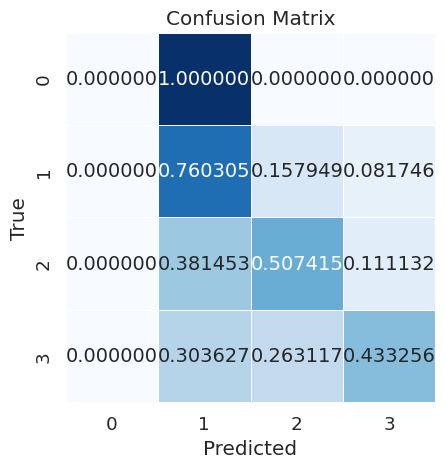

In [197]:
import seaborn as sns

sns.set(font_scale=1.2)  # Adjust the font size if needed

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="f", cmap="Blues", cbar=False, 
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [199]:
new_df = df[df['sentimen-text'] != 'Neutral']

In [201]:
new_df_1 = new_df[new_df['Target'] != 'Neutral']

In [224]:
np.mean(new_df_1['Target'] == new_df_1['sentimen-text'])

0.764163979732842

In [223]:
cm_new = confusion_matrix (new_df_1['sentimen-text'],new_df_1['Target'], normalize='true')
cm

array([[0.        , 1.        , 0.        ],
       [0.        , 0.90292061, 0.09707939],
       [0.        , 0.41204188, 0.58795812]])

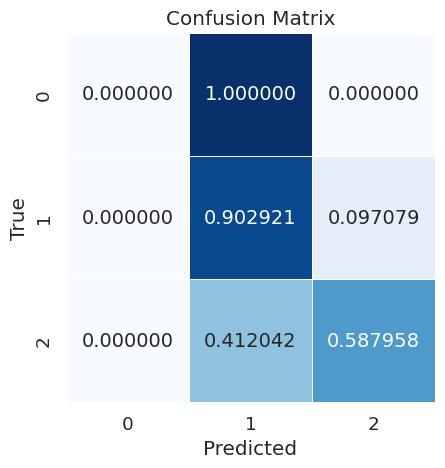

In [206]:
sns.set(font_scale=1.2)  # Adjust the font size if needed

# Create a heatmap
sns.heatmap(cm_new, annot=True, fmt="f", cmap="Blues", cbar=False, 
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [215]:
def plot_cm(cm):
    classes = ['Negative','Positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm_new)


ValueError: Shape of passed values is (3, 3), indices imply (2, 2)

<Axes: >

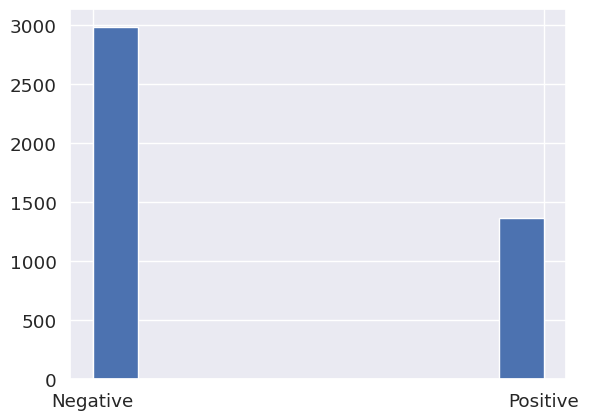

In [225]:
new_df_1['Target'].hist()

In [228]:
new_df_2 = new_df_1[new_df_1['sentimen-text'] != '0']

# df[df['Age'] == 30]
# new_df_1 = new_df[new_df['Target'] != 'Neutral']

<Axes: >

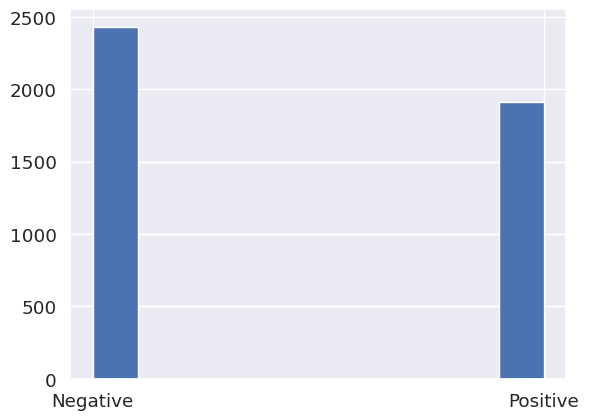

In [230]:
new_df_2['sentimen-text'].hist()

In [234]:
cm_new_2 = confusion_matrix(new_df_2['sentimen-text'],new_df_2['Target'], normalize='true')
cm_new_2

array([[0.90292061, 0.09707939],
       [0.41204188, 0.58795812]])

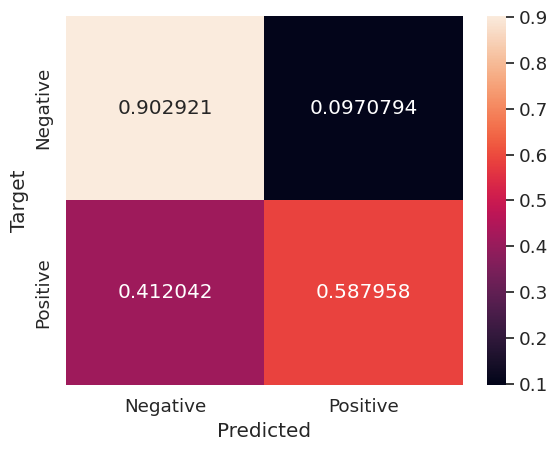

In [235]:
plot_cm(cm_new_2)

In [236]:
len(new_df_2)

4341